In [5]:
import cv2
import numpy as np
import pandas as pd
import pickle as cPickle
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,confusion_matrix,multilabel_confusion_matrix,recall_score

## Analysis of KNN value and metrices impact on final result

To check the impact of K and metrices in Knn classifier, we decided to run the algorithm for basic values of SIFT with 300 features and kmeans k for codebooks = 128. 

Algorithm was run for values of k starting from 1 to 51, jumping by 2, for each value of k, 4 metrices were calculated: euclidean, manhattan, chebyshev and minkowski.

furthermore DENSE sift was explored with different step sizes of 5 and 20.

in the end LDA and PCA was run against the obtained results and final conlusion where drawn.

Below there is a pickle file with all data stored in single dataframe that is then used to visualize the outcomes. Code can be found in file "BagofVisualWords.ipynb"

In [17]:
with open('N300K128KNN1_51_ALL_FINAL.pkl','rb') as f:
    df_new=cPickle.load(f)

### Graph showing values of precision and recall for different values of DENSE SIFT

max
      knn  precision     recall  accuracy     metric  dense  pca  lda
246   27  63.194782  63.515415  63.07311  chebyshev      0    0    1


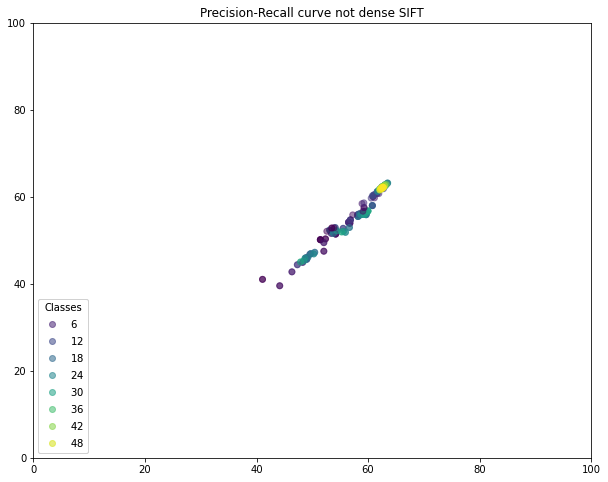

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title='Precision-Recall curve not dense SIFT', xlim=(0,100), ylim=(0,100))

df2=df_new[df_new.dense==0]
# print(df2)
print("max\n",df2[df2.precision==df2.precision.max()])
# print(df2[df2.recall==df2.recall.max()])
scatter=ax.scatter(df2.recall, df2.precision, c=df2.knn,
           label=df2.knn,
           marker='o', alpha=.5,
           cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

We can see here wide spread of values trying to reaching 1-1 of precision recall curve having maximum value of 63% at knn equals to 27 when no dense sift is used. But lets see what happens when different dense SIFT is used

max
      knn  precision     recall   accuracy     metric  dense  pca  lda
117   27  78.640697  78.617144  78.314746  manhattan      5    0    0


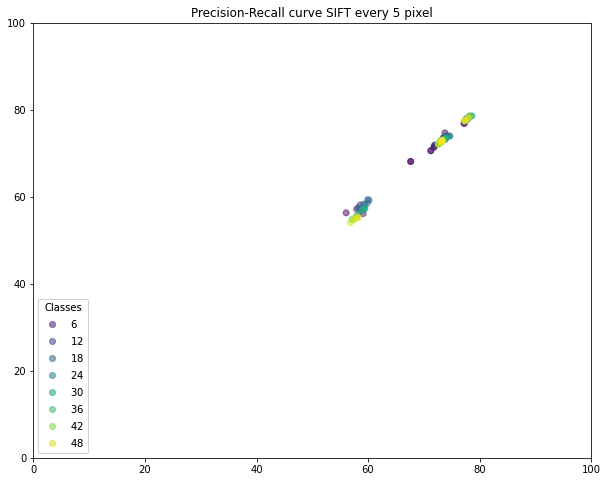

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title='Precision-Recall curve SIFT every 5 pixel', xlim=(0,100), ylim=(0,100))

df2=df_new[(df_new.dense==5)&(df_new.lda==0)]
# print(df2)
print("max\n",df2[df2.precision==df2.precision.max()])
# print(df2[df2.recall==df2.recall.max()])
scatter=ax.scatter(df2.recall, df2.precision, c=df2.knn,
           label=df2.knn,
           marker='o', alpha=.5,
           cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

When DENSE is done with step size of 5, maximum value stays at KNN equals to 27 however it reaches 78%, what happens if we increase step size

max
      knn  precision     recall   accuracy     metric  dense  pca  lda
409   37  78.551703  78.369286  78.066914  manhattan     20    0    0


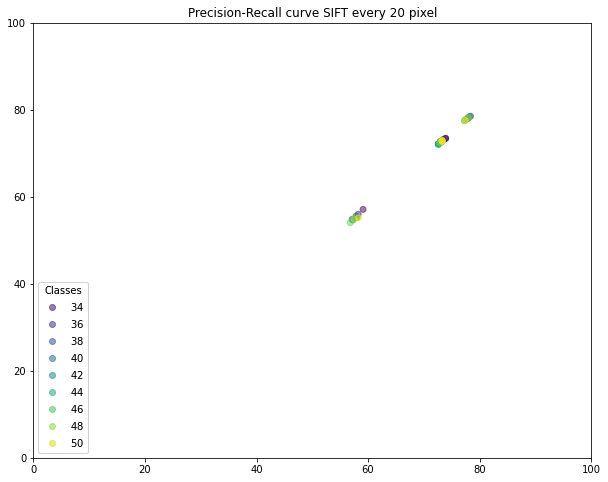

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title='Precision-Recall curve SIFT every 20 pixel', xlim=(0,100), ylim=(0,100))

df2=df_new[df_new.dense==20]
# print(df2)
print("max\n",df2[df2.precision==df2.precision.max()])
# print(df2[df2.recall==df2.recall.max()])
scatter=ax.scatter(df2.recall, df2.precision, c=df2.knn,
           label=df2.knn,
           marker='o', alpha=.5,
           cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

With increased step size to 20, there is no noticable change in performance. Lets see now how the values changes for different metrices

### Graph showing values for different metrices of KNN

max
      knn  precision     recall   accuracy     metric  dense  pca  lda
117   27  78.640697  78.617144  78.314746  manhattan      5    0    0
     knn  precision     recall   accuracy     metric  dense  pca  lda
117   27  78.640697  78.617144  78.314746  manhattan      5    0    0


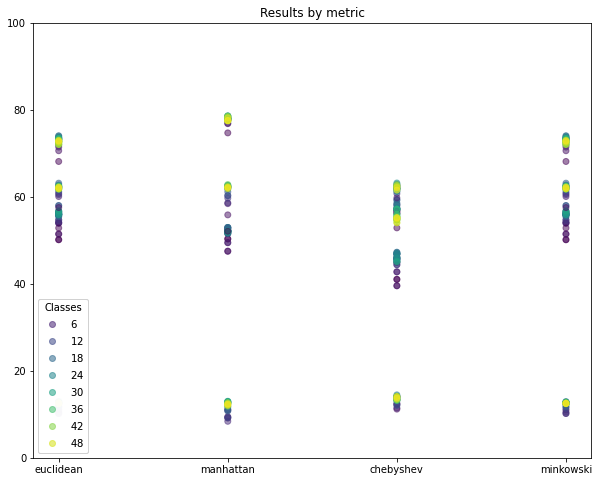

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title='Results by metric',ylim=(0,100))

df2=df_new
# print(df2)
print("max\n",df2[df2.precision==df2.precision.max()])
print(df2[df2.recall==df2.recall.max()])
scatter=ax.scatter(df2.metric, df2.precision, c=df2.knn,
           label=df2.knn,
           marker='o', alpha=.5,
           cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

We can notice here that values are grouped and widely spread along metrices and in addition that chebyshev metric seems to be performing worst where manhattan seems to yield best results. Let's see some better representation of the same data

### Graph showing metrices with knn values from 0-51 and dense 0 and 5 and lda = 0 and pca = 0

In [13]:
df2_man_d0=df_new[(df_new.metric=='manhattan')&(df_new.dense==0)&(df_new.lda==0)&(df_new.pca==0)]
df2_euc_d0=df_new[(df_new.metric=='euclidean')&(df_new.dense==0)&(df_new.lda==0)&(df_new.pca==0)]
df2_che_d0=df_new[(df_new.metric=='chebyshev')&(df_new.dense==0)&(df_new.lda==0)&(df_new.pca==0)]
df2_man_d5=df_new[(df_new.metric=='manhattan')&(df_new.dense==5)&(df_new.lda==0)&(df_new.pca==0)]
df2_euc_d5=df_new[(df_new.metric=='euclidean')&(df_new.dense==5)&(df_new.lda==0)&(df_new.pca==0)]
df2_che_d5=df_new[(df_new.metric=='chebyshev')&(df_new.dense==5)&(df_new.lda==0)&(df_new.pca==0)]

max
      knn  precision     recall   accuracy     metric  dense  pca  lda
117   27  78.640697  78.617144  78.314746  manhattan      5    0    0


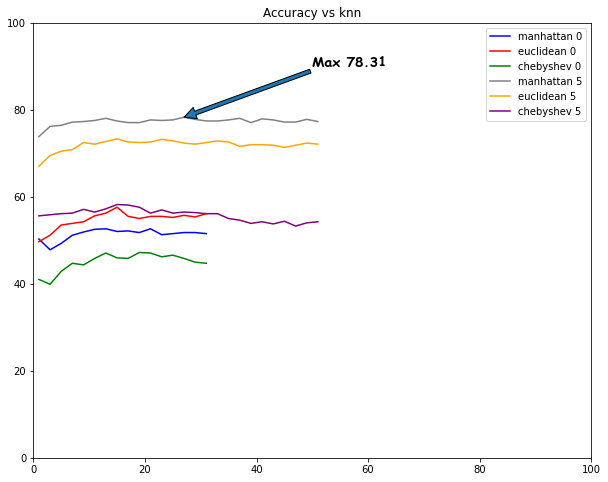

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set(title='Accuracy vs knn', xlim=(0,100), ylim=(0,100))

print("max\n",df2[df2.precision==df2.precision.max()])
# print(df2[df2.recall==df2.recall.max()])
ax.plot(df2_man_d0.knn, df2_man_d0.accuracy, color='b', label='manhattan 0')
ax.plot(df2_euc_d0.knn, df2_euc_d0.accuracy, color='r', label='euclidean 0')
ax.plot(df2_che_d0.knn, df2_che_d0.accuracy, color='g', label='chebyshev 0')
ax.plot(df2_man_d5.knn, df2_man_d5.accuracy, color='gray', label='manhattan 5')
ax.plot(df2_euc_d5.knn, df2_euc_d5.accuracy, color='orange', label='euclidean 5')
ax.plot(df2_che_d5.knn, df2_che_d5.accuracy, color='purple', label='chebyshev 5')
ax.legend()

max_val = max(df_new.accuracy)
max_idx = df_new.knn[df_new.accuracy.idxmax()]
# ax.annotate("Max {:.2f}".format(max_val), xy=(max_idx, max_val),
#            weight='bold', size=14)

# arrowprops is a mpl.patches.FancyArrowPatch
_ = ax.annotate("Max {:.2f}".format(max_val), xy=(max_idx, max_val),
                weight='bold', size=14, 
                xytext=(.5, .9),
                textcoords='axes fraction',
                family='comic sans ms',
                arrowprops={})

On above graph we can directly see that manhattan metric with density equal to 5 achieves way better results of almost 80% where other falls way behind.

Interetsingly for not densed SIFT euclidean distance shows better results that manhattan.

In addition even when densed sift shows a lot better results for other metrices when using Chebyshev metric it reaches almost same performance as euclidean with not densed SIFT.

### Showing that PCA does not impact KNN algorithm where LDA improves it by 10% for not dense SIFT

In [15]:
df_new[(df_new.knn==27)&(df_new.dense==0)&(df_new.metric=='manhattan')]

,knn,precision,recall,accuracy,metric,dense,pca,lda
53,27,52.089132,55.596043,51.796778,manhattan,0,0,0
181,27,52.089132,55.596043,51.796778,manhattan,0,1,0
245,27,62.634501,62.943858,62.453532,manhattan,0,0,1


For best result of KNN=27 we can see that PCA shows the same values where LDA improves not dense values by 10%

## Conclusion of KNN value being changes and its metrices including pca,lda and DENSE SIFT
As we can see above for not dense SIFT we receive values between 40% to almost 60% the best results are shown in this case for euclidean distance.

For the Dense with step size = 5 we can see great improvemenet of almost 20% and the best accuracy reaches 78% using manhattan distance.

Chebyshev metric yelds worst results at all combinations.

We can see that increasing knn is not changing a lot the final accuracy and in some cases it also drops with higher numbers. For SIFT dense with step of 5 pixels best accuracy is shown for knn=27.

Last tabels shows no impact of PCA to the results when parameters of knn is changed, which seems obvious considering the fact that knn change impacts only final fitting and matching the labels with visual words and it does not depend on dimensionality. We would need to change other parameters like number of features or k-means to see impact of PCA.

In addition there is no diference in results when density is changed from 5 to 20.